<a href="https://colab.research.google.com/github/jpiche0720/DS-Unit-2-Kaggle-Challenge/blob/master/LS_DS_221_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [X] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [X] Do train/validate/test split with the Tanzania Waterpumps data.
- [X] Begin with baselines for classification.
- [X] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [X] Get your validation accuracy score.
- [X] Get and plot your feature importances.
- [X] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [X] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
# Check Pandas Profiling version
import pandas_profiling
pandas_profiling.__version__

'2.4.0'

In [0]:
# Old code for Pandas Profiling version 2.3
# It can be very slow with medium & large datasets.
# These parameters will make it faster.

# profile = train.profile_report(
#     check_correlation_pearson=False,
#     correlations={
#         'pearson': False,
#         'spearman': False,
#         'kendall': False,
#         'phi_k': False,
#         'cramers': False,
#         'recoded': False,
#     },
#     plot={'histogram': {'bayesian_blocks_bins': False}},
# )
#

# New code for Pandas Profiling version 2.4
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

# Assignment

 - Sign up for a Kaggle account, if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
 
- X Do train/validate/test split with the Tanzania Waterpumps data.
 
- X Begin with baselines for classification.
 
- Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
 
- Get your validation accuracy score.
 
- Get and plot your feature importances.
 
- Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue Submit Predictions button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
 
- Commit your notebook to your fork of the GitHub repo.






# Doing

- Add your own stretch goal(s) !
- Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For -example, what columns have zeros and shouldn't? What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- Try other scikit-learn imputers.
- Make exploratory visualizations and share on Slack.

# Majority Classifier


In [0]:
df = train.copy()
pd.set_option('display.max_columns',45)

In [0]:
# Majority Classifer
my_dict = df['status_group'].value_counts(normalize=True).to_dict() 
max_key = max(my_dict, key=my_dict.get)
key_val = max(my_dict.values())

print(f'The Majority Classifier is {max_key}','\n', f'predicting this for every occurance would give us a overall success rate of {key_val:.02f}%')

The Majority Classifier is functional 
 predicting this for every occurance would give us a overall success rate of 0.54%


# Data Exploration / Cleaning

In [0]:
len(df.columns)


41

In [0]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# Data Wrangle

In [0]:
import numpy as np

def clean(X):
    X = X.copy()
    
    # Drop Latitude and Longitude values that are not in scope
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    cols_with_zeros = ['longitude','latitude''gps_height,'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
   
    # Time Elapsed since construction
    X['construction_year'] = X['construction_year'].replace(0,np.NaN)
    X['construction_year'] = X['construction_year'].replace(np.NaN,round(X['construction_year'].mean()))
    X['elapsed_time'] = (pd.to_datetime(X['date_recorded']).dt.year -
                         pd.to_datetime(X['construction_year'],format='%Y').dt.year)
    
    # revert years to objects
    X['construction_year']= X['construction_year'].astype(str)
    X['date_recorded'] = X['date_recorded'].astype(str)
    
    # Drop Similar columns and useless column num_private
    X = X.drop(columns=['payment_type','num_private','extraction_type_group',
                        'extraction_type_class','quantity_group','source_type',
                        'waterpoint_type_group'])
    
    # Drop High Cardianl categorical columns
    
    for col in X.columns:
        if X[col].dtype != int and X[col].nunique()>1000:
            X = X.drop(columns=col)
    
    
    return X

    
    

In [0]:
data = clean(df)

In [0]:
train, val = train_test_split(data, test_size=0.2,stratify=data['status_group'])
train.shape, val.shape

((47520, 25), (11880, 25))

In [0]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt


In [0]:
target = 'status_group'
features = train.columns.drop([target,'id'])

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [0]:
pipeline = make_pipeline(ce.OrdinalEncoder(),
                         SimpleImputer(missing_values=np.NaN,strategy='mean'),
                         DecisionTreeClassifier(max_depth= 20,min_samples_leaf=10,random_state=42))

pipeline.fit(X_train,y_train)
train_score = pipeline.score(X_train,y_train)
val_score = pipeline.score(X_val,y_val)


print(f'Training accuracy = {train_score}')
print(f'Validation accuracy = {val_score}')

Training accuracy = 0.8139309764309764
Validation accuracy = 0.7721380471380471


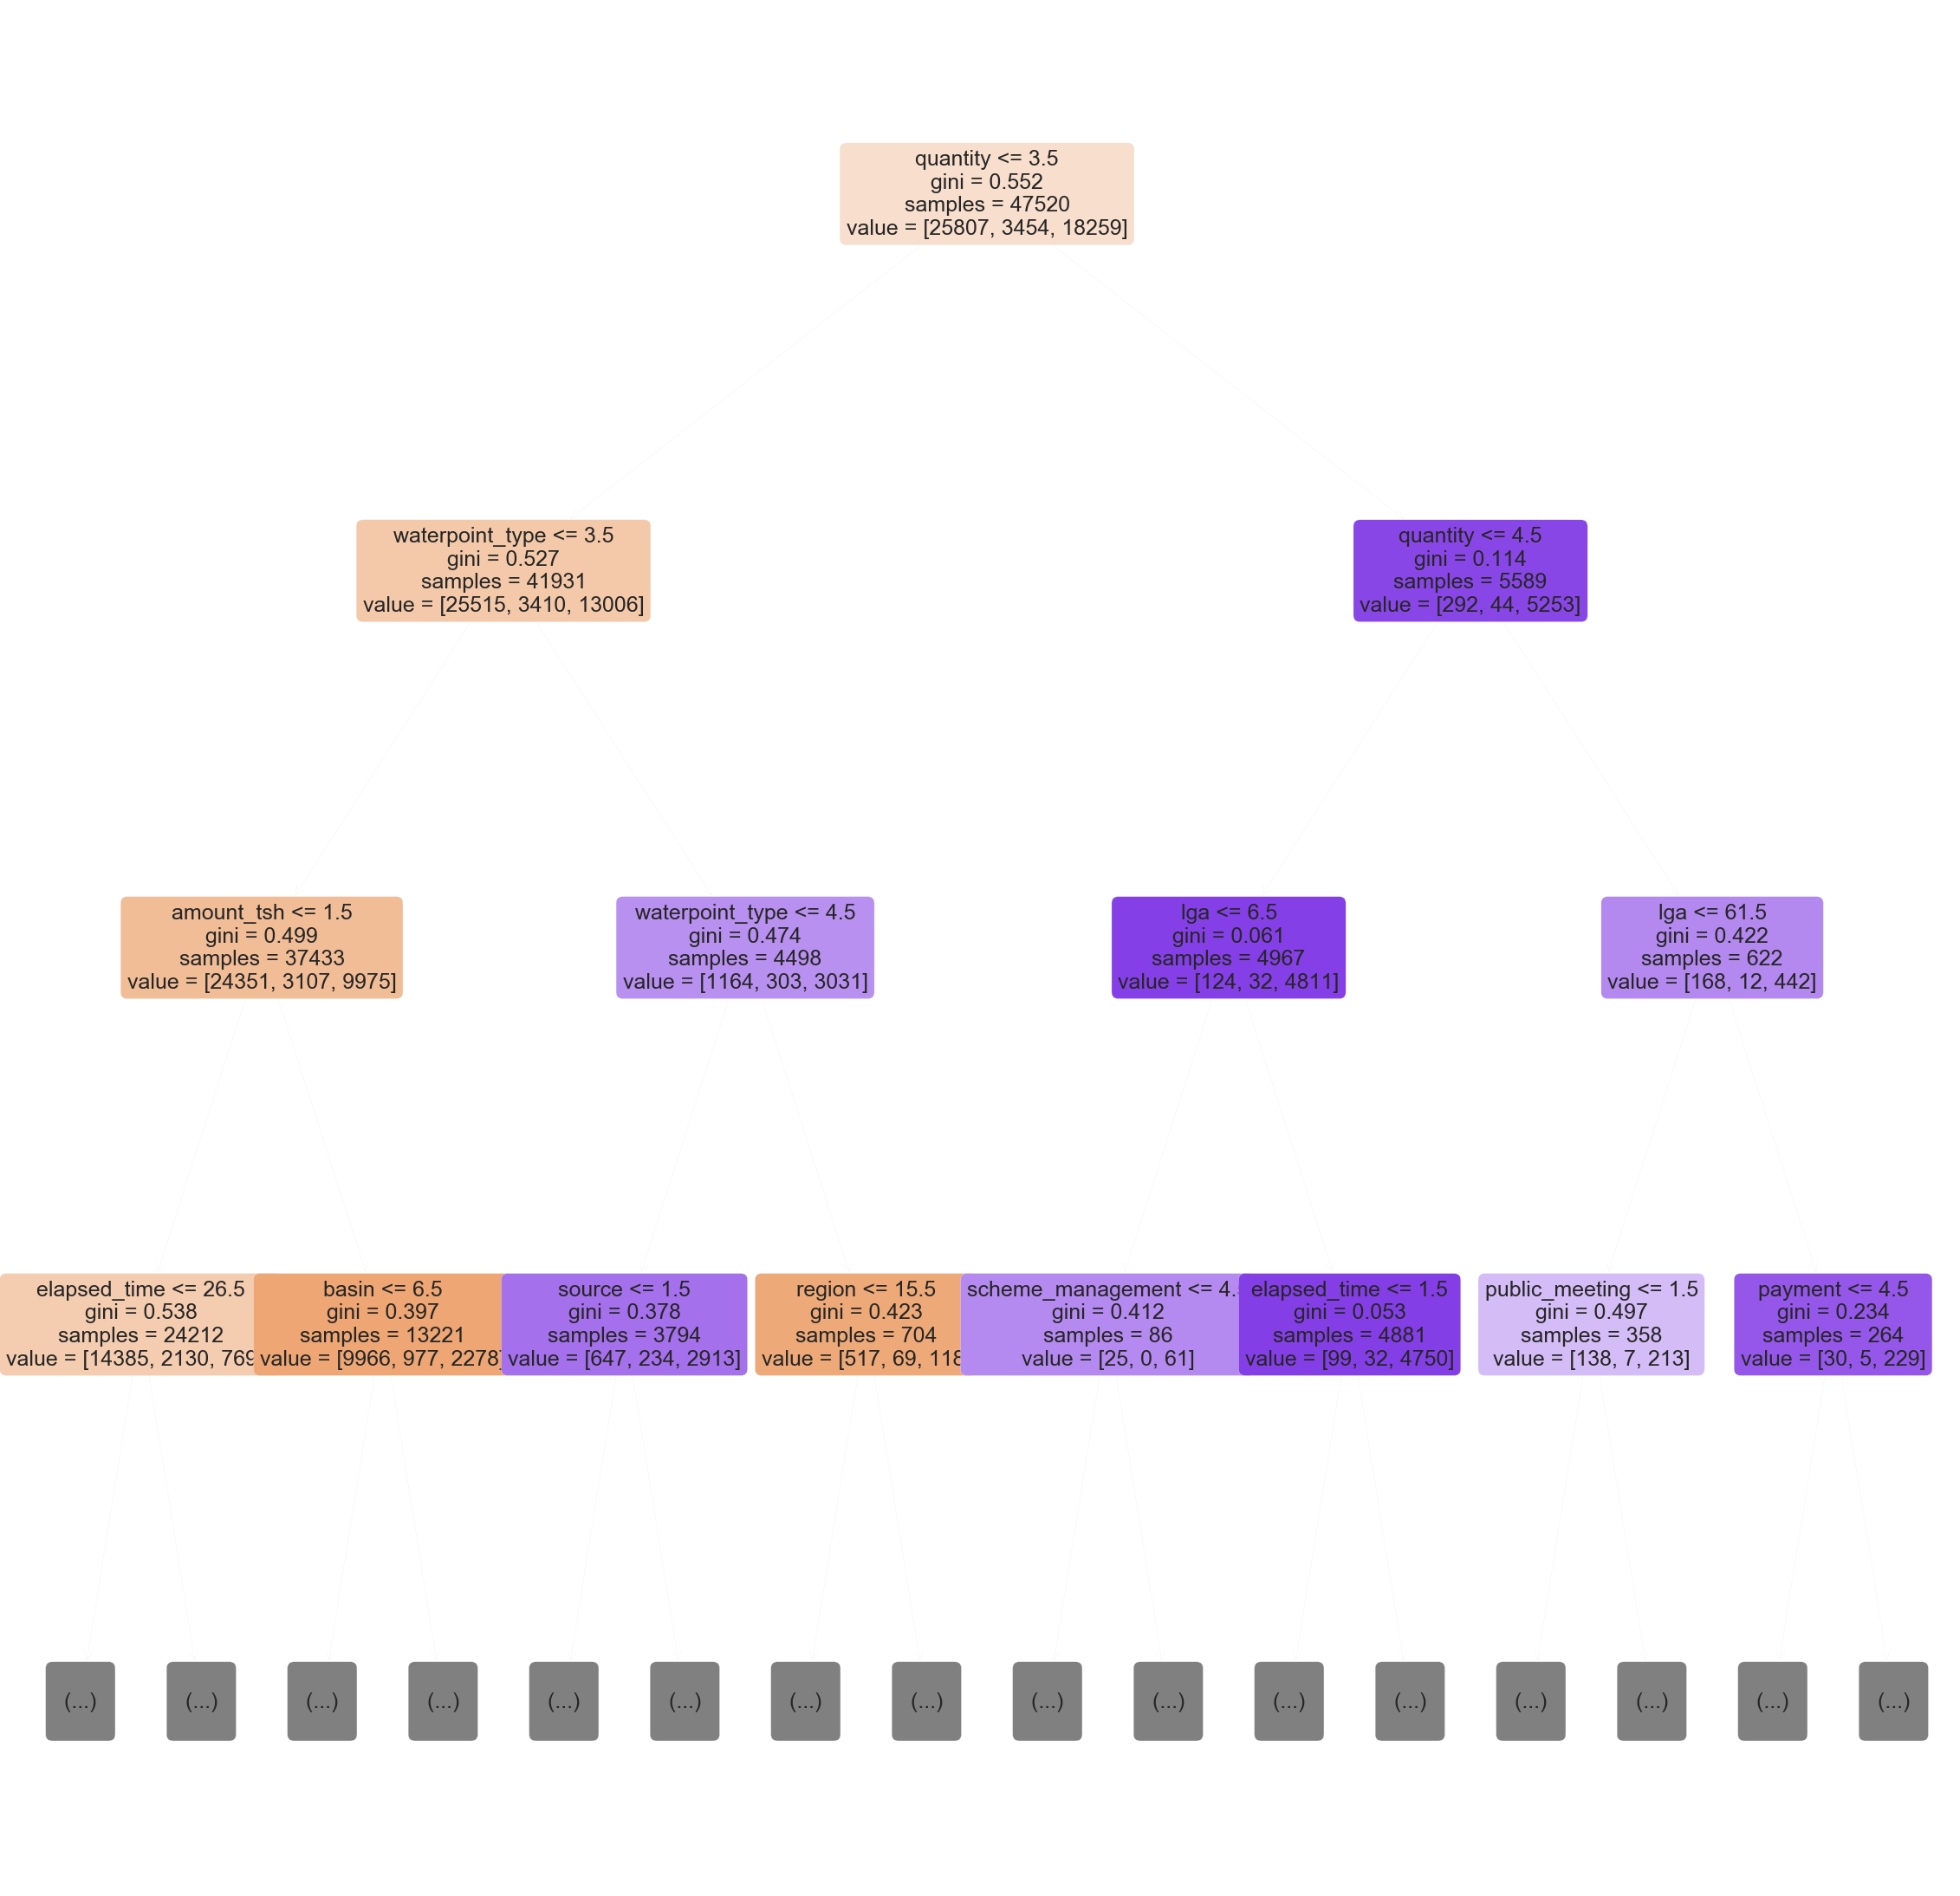

In [0]:
clf = pipeline.named_steps['decisiontreeclassifier']
plt.figure(figsize=(40,40))  
plot_tree(clf,max_depth=3,feature_names=features,
          filled=True, fontsize=25, rounded = True)
plt.show()

In [0]:
feats = pd.DataFrame(clf.feature_importances_,features)
feats = feats.reset_index()
feats.columns = ['name','geni']

feats = feats.sort_values(by='geni',ascending=False)

feats = feats.reset_index()
feats = feats.drop(columns='index')
features = feats['name'].to_list()
feats.head()

,name,geni
0,quantity,0.269571
1,waterpoint_type,0.140299
2,elapsed_time,0.082455
3,date_recorded,0.075734
4,extraction_type,0.048000


In [0]:
test = clean(test)
predictions = pipeline.predict(test[features])
predictions.shape

(14358,)

In [0]:
col= test['id']
submission = pd.DataFrame(predictions,index=col,columns=['status_group'])

submission = submission.reset_index()
print(submission.shape)
submission.head()

(14358, 2)


,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [0]:
def csv_download_link(df, csv_file_name, delete_prompt=True):
    """Display a download link to load a data frame as csv from within a Jupyter notebook"""
    df.to_csv(csv_file_name, index=False)
    from IPython.display import FileLink, FileLinks
    display(FileLink(csv_file_name))
# Diplay download link:
csv_download_link(submission, 'Tanzania.csv')



/Users/jp/DS-Unit-2-Kaggle-Challenge/module1-decision-trees/Tanzania.csv